# Discrimination Threshold Analysis

This is a discrimination threshold analysis on selected better performing decision trees. This was determined in the notebook "Classification Report Selected Decision Trees.ipynb"

The data is from the team's "MLTable1"

Using Yellowbrick's  discrimination threshold. Link:
https://www.scikit-yb.org/en/latest/api/classifier/threshold.html 

In [1]:
#imports 
import pandas as pd
import boto3
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
pd.set_option('display.max_columns', 200)
%matplotlib inline 

from yellowbrick.classifier import DiscriminationThreshold
from yellowbrick.classifier.threshold import discrimination_threshold

## Load the Data

In [2]:
#load in the csvs
#TODO For Team: enter the credentails below to run
S3_Key_id=''
S3_Secret_key=''

def pull_data(Key_id, Secret_key, file):
    """
    Function which CJ wrote to pull data from S3 
    """
    BUCKET_NAME = "gtown-wildfire-ds"
    OBJECT_KEY = file
    client = boto3.client(
        's3',
        aws_access_key_id= Key_id,
        aws_secret_access_key= Secret_key)
    obj = client.get_object(Bucket= BUCKET_NAME, Key= OBJECT_KEY) 
    file_df = pd.read_csv(obj['Body'])
    return (file_df)

#Pull in the firms and scan df
file = 'MLTable1.csv'
df = pull_data(S3_Key_id, S3_Secret_key, file)
df.head()

,Unnamed: 0,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,1,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,4,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,5,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,10,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [3]:
#unnamed seems to be a column brought in that we dont want. drop it. 
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,brightness,scan,track,confidence,bright_t31,frp,Precipitation Accumulation (in) Start of Day Values,Precipitation Increment (in),Air Temperature Average (degF),Soil Moisture Percent -2in (pct) Start of Day Values,Relative Humidity Enclosure (pct),Wind Speed Average (mph),nearbydetections,FIRE_DETECTED,1,Aqua,Terra,MODIS,Arkansas-White-Red Region,California Region,Great Basin Region,Great Lakes Region,Hawaii Region,Lower Colorado Region,Lower Mississippi Region,Mid Atlantic Region,Missouri Region,New England Region,Ohio Region,Pacific Northwest Region,Rio Grande Region,Souris-Red-Rainy Region,South Atlantic-Gulf Region,Tennessee Region,Texas-Gulf Region,Upper Colorado Region,Upper Mississippi Region
0,312.5,1.2,1.1,85,269.1,21.9,11.5,0.0,2.0,36.1,78.0,7.1,0.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,309.8,4.0,1.9,68,289.9,82.0,7.8,0.0,-8.0,4.9,66.0,1.8,5.0,False,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,312.8,4.0,1.9,80,287.1,103.7,11.3,0.0,14.0,26.9,79.0,10.5,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,310.2,4.0,1.9,70,287.3,83.6,8.4,0.0,11.0,8.0,88.0,4.2,5.0,False,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,300.4,1.0,1.0,28,281.6,6.3,12.8,0.0,15.0,33.1,88.0,3.6,23.0,False,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [4]:
df.shape

(1396691, 37)

In [11]:
df['FIRE_DETECTED'].value_counts()

False    1357647
True       39044
Name: FIRE_DETECTED, dtype: int64

## ML Prep

In [5]:
#seperate data sets as labels and features
X = df.drop('FIRE_DETECTED', axis=1)
y = df['FIRE_DETECTED']

In [6]:
#train test splitting of data
#common syntax here is to use X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [7]:
#create our scalar to get optimized result
sc = StandardScaler() #runs the standard scalar with default settings. you can refine this, see docs
#transform the feature data by using the fit_transform 
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test) 

## Discrimination Threshold

Start with discrimination threshold from highest "Fire" recall score with a (relatively) higher F1 score from the "Classisfication Report Selected Decision Trees.ipynb"

In [12]:
#start with the model below
model = DecisionTreeClassifier(criterion='entropy', splitter='random')
visualizer = DiscriminationThreshold(model)
visualizer.fit(X, y) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure

AttributeError: 'DecisionTreeClassifier' object has no attribute 'pred_proba'

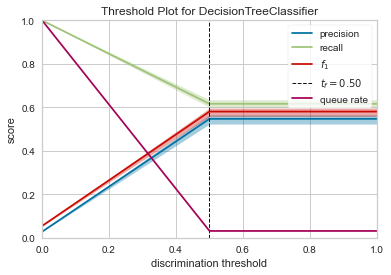

<AxesSubplot:title={'center':'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [10]:
#try another model?
model = DecisionTreeClassifier(splitter='random')
visualizer = DiscriminationThreshold(model)
visualizer.fit(X, y) # Fit the data to the visualizer
visualizer.show() # Finalize and render the figure